# Importing the Libraries


In [96]:
import pandas as pd
import numpy as np

In [97]:
# Load data
df = pd.read_csv("../data/india_housing_prices.csv")  

In [98]:
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [99]:
df.shape

(250000, 23)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [101]:
df.describe(include=['int64', 'float64']).T

,count,mean,std,min,25%,50%,75%,max
ID,250000.0,125000.500000,72168.927986,1.0,62500.75,125000.50,187500.25,250000.00
BHK,250000.0,2.999396,1.415521,1.0,2.00,3.00,4.00,5.00
Size_in_SqFt,250000.0,2749.813216,1300.606954,500.0,1623.00,2747.00,3874.00,5000.00
Price_in_Lakhs,250000.0,254.586854,141.349921,10.0,132.55,253.87,376.88,500.00
Price_per_SqFt,250000.0,0.130597,0.130747,0.0,0.05,0.09,0.16,0.99
Year_Built,250000.0,2006.520012,9.808575,1990.0,1998.00,2007.00,2015.00,2023.00
Floor_No,250000.0,14.966800,8.948047,0.0,7.00,15.00,23.00,30.00
Total_Floors,250000.0,15.503004,8.671618,1.0,8.00,15.00,23.00,30.00
Age_of_Property,250000.0,18.479988,9.808575,2.0,10.00,18.00,27.00,35.00
Nearby_Schools,250000.0,5.499860,2.878639,1.0,3.00,5.00,8.00,10.00


In [102]:
df.duplicated().sum()

np.int64(0)

In [103]:
df.isna().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

In [104]:
#Price_in_Lakhs -> numeric
df['Price_in_Lakhs'] = pd.to_numeric(df['Price_in_Lakhs'], errors='coerce')

In [105]:
df['Price_per_SqFt'] = df['Price_in_Lakhs']*1e5 / df['Size_in_SqFt']

In [106]:
# Round to 2 decimal places
df['Price_per_SqFt'] = df['Price_per_SqFt'].round(2)
df.head(2)

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,10332.49,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,8270.73,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction


In [107]:
df.isna().sum() == 0

ID                                True
State                             True
City                              True
Locality                          True
Property_Type                     True
BHK                               True
Size_in_SqFt                      True
Price_in_Lakhs                    True
Price_per_SqFt                    True
Year_Built                        True
Furnished_Status                  True
Floor_No                          True
Total_Floors                      True
Age_of_Property                   True
Nearby_Schools                    True
Nearby_Hospitals                  True
Public_Transport_Accessibility    True
Parking_Space                     True
Security                          True
Amenities                         True
Facing                            True
Owner_Type                        True
Availability_Status               True
dtype: bool

In [108]:
#imputation not required-still added if future data contains missing entries
# Impute numeric columns with median
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

In [109]:
# Impute categorical with mode
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode().iloc[0])

In [110]:
import datetime
current_year = datetime.datetime.now().year
if 'Year_Built' in df.columns:
    df['Age_of_Property'] = current_year - pd.to_numeric(df['Year_Built'], errors='coerce')
    df['Age_of_Property'] = df['Age_of_Property'].fillna(df['Age_of_Property'].median())

In [111]:
#creating binary flag
df['is_ready_to_move'] = df['Availability_Status'].str.lower().str.contains('ready').astype(int)

In [112]:
df['is_ready_to_move'].unique()

array([1, 0])

In [113]:
df['Parking_Space'].unique()

array(['No', 'Yes'], dtype=object)

In [114]:
df['has_parking'] = df['Parking_Space'].fillna('No').map({'Yes': 1, 'No': 0})

In [115]:
df['has_parking'].unique()

array([0, 1])

In [116]:
#outlier detection
def cap_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3-q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    return series.clip(lower=low, upper=high)

df['Price_per_SqFt_capped'] = cap_outliers(df['Price_per_SqFt'])

In [117]:
df['Size_in_SqFt_capped'] = cap_outliers(df['Size_in_SqFt'])

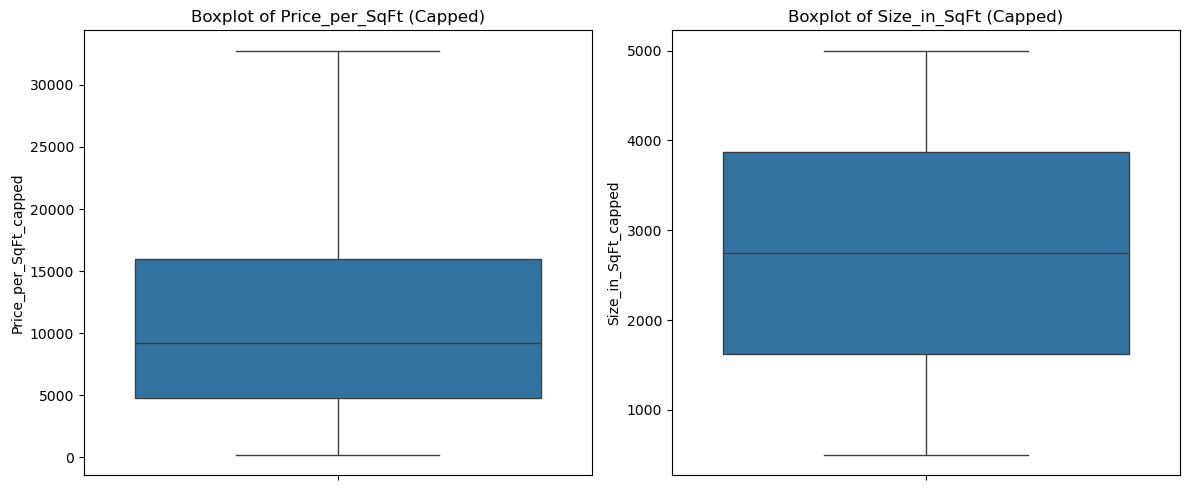

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting figure size and style
plt.figure(figsize=(12, 5))

# FIRST subplot – Price_per_SqFt_capped
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Price_per_SqFt_capped'])
plt.title("Boxplot of Price_per_SqFt (Capped)")

# SECOND subplot – Size_in_SqFt_capped
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Size_in_SqFt_capped'])
plt.title("Boxplot of Size_in_SqFt (Capped)")

plt.tight_layout()
plt.show()

In [119]:
df['City_median_price'] = df.groupby('City')['Price_in_Lakhs'].transform('median')
df['Good_Investment'] = (
    ((df['Price_in_Lakhs'] <= df['City_median_price']) | (df['Price_per_SqFt'] <= df.groupby('City')['Price_per_SqFt'].transform('median'))) &
    (df['is_ready_to_move'] == 1) &
    ((df['BHK'] >= 2) | (df['has_parking'] == 1))
).astype(int)

In [120]:
df_clean = df.copy()
df_clean.to_csv("../outputs/cleaned_india_housing_prices.csv", index=False)
print("Saved cleaned dataset to outputs/cleaned_india_housing_prices.csv")

Saved cleaned dataset to outputs/cleaned_india_housing_prices.csv
